# Convolutional Neural Network

### Importing the libraries

In [1]:
!pip install --upgrade tensorflow keras Pillow

In [2]:
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [3]:

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [4]:
tf.__version__

'2.8.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [7]:
cnn = tf.keras.models.Sequential()

2022-03-26 22:50:24.898630: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-26 22:50:24.898693: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2022-03-26 22:50:24.900467: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Step 1 - Convolution

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))

### Adding a second convolutional layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(((2, 2))))
cnn.add(tf.keras.layers.Dropout(0.2))

### Adding a third convolutional layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
cnn.add(tf.keras.layers.Dropout(0.2))

### Step 3 - Flattening

In [12]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [14]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

## Define optimizer

In [15]:
opt = SGD(learning_rate=0.001, momentum=0.9)

### Compiling the CNN

In [16]:
cnn.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [17]:
#cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

In [18]:
history = cnn.fit(training_set, steps_per_epoch=len(training_set),validation_data=test_set, validation_steps=len(test_set), epochs=50)

Epoch 1/50
250/250 [==============================] - 46s 180ms/step - loss: 0.7059 - accuracy: 0.5487 - val_loss: 0.6783 - val_accuracy: 0.5455
Epoch 2/50
250/250 [==============================] - 54s 217ms/step - loss: 0.6748 - accuracy: 0.5751 - val_loss: 0.6733 - val_accuracy: 0.5425
Epoch 3/50
250/250 [==============================] - 55s 219ms/step - loss: 0.6613 - accuracy: 0.5926 - val_loss: 0.6597 - val_accuracy: 0.5870
Epoch 4/50
250/250 [==============================] - 57s 228ms/step - loss: 0.6585 - accuracy: 0.6083 - val_loss: 0.6495 - val_accuracy: 0.6300
Epoch 5/50
250/250 [==============================] - 54s 217ms/step - loss: 0.6449 - accuracy: 0.6165 - val_loss: 0.6391 - val_accuracy: 0.6475
Epoch 6/50
250/250 [==============================] - 57s 228ms/step - loss: 0.6315 - accuracy: 0.6351 - val_loss: 0.6280 - val_accuracy: 0.6520
Epoch 7/50
250/250 [==============================] - 60s 239ms/step - loss: 0.6194 - accuracy: 0.6557 - val_loss: 0.6135 - val_ac

In [19]:
from matplotlib import pyplot

## Part 4 - Plot diagnostic learning curves

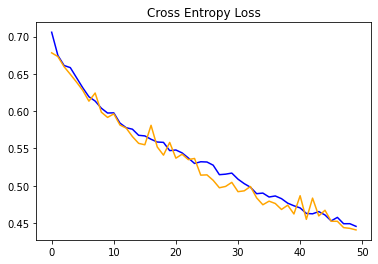

In [34]:

pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')


## Part 5 - Plot accuracy

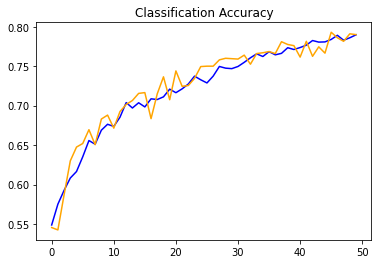

In [35]:

pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

## Part 5 - Making a single prediction

In [26]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [27]:
print(prediction)

dog


## Fim